In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Set paths to your datasets
train_dir = '/content/drive/MyDrive/Dataset'
validation_dir = '/content/drive/MyDrive/Dataset'

# Set image parameters
img_width, img_height = 128, 128
batch_size = 32

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Ensures the labels are one-hot encoded for categorical crossentropy
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 3252 images belonging to 4 classes.
Found 3252 images belonging to 4 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 output units for 4 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


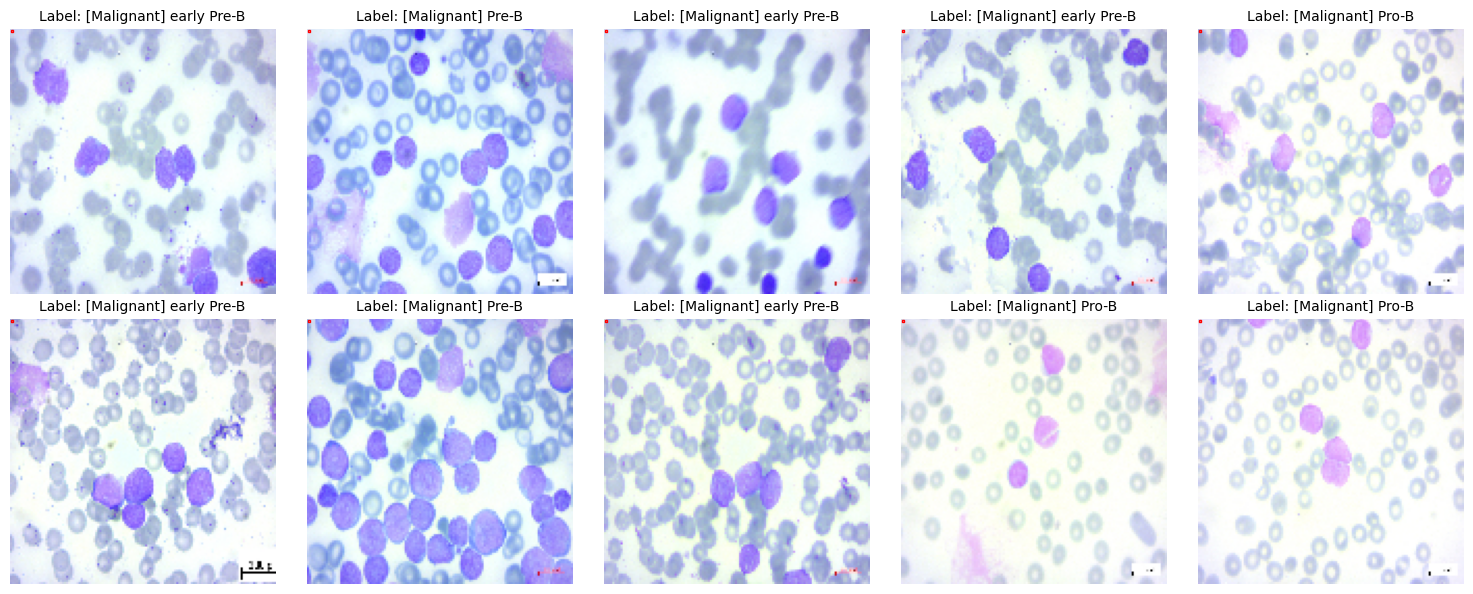

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def display_sample_images(generator, num_samples=10, grid_size=(2, 5)):
    # Get a batch of images and labels
    images, labels = next(generator)

    # Get class labels from generator
    class_labels = list(generator.class_indices.keys())

    # Set up the plot
    plt.figure(figsize=(15, 6))

    for i in range(num_samples):
        # Extract and prepare the image
        img = images[i]
        label = class_labels[np.argmax(labels[i])]

        plt.subplot(grid_size[0], grid_size[1], i + 1)
        plt.imshow(img)
        plt.title(f'Label: {label}', fontsize=10)
        plt.axis('off')  # Hide axes

        # Add border around the image
        plt.gca().add_patch(plt.Rectangle((0, 0), 1, 1, fill=False, edgecolor='red', linewidth=1))

    plt.tight_layout()
    plt.show()

# Example usage
display_sample_images(validation_generator, num_samples=10, grid_size=(2, 5))


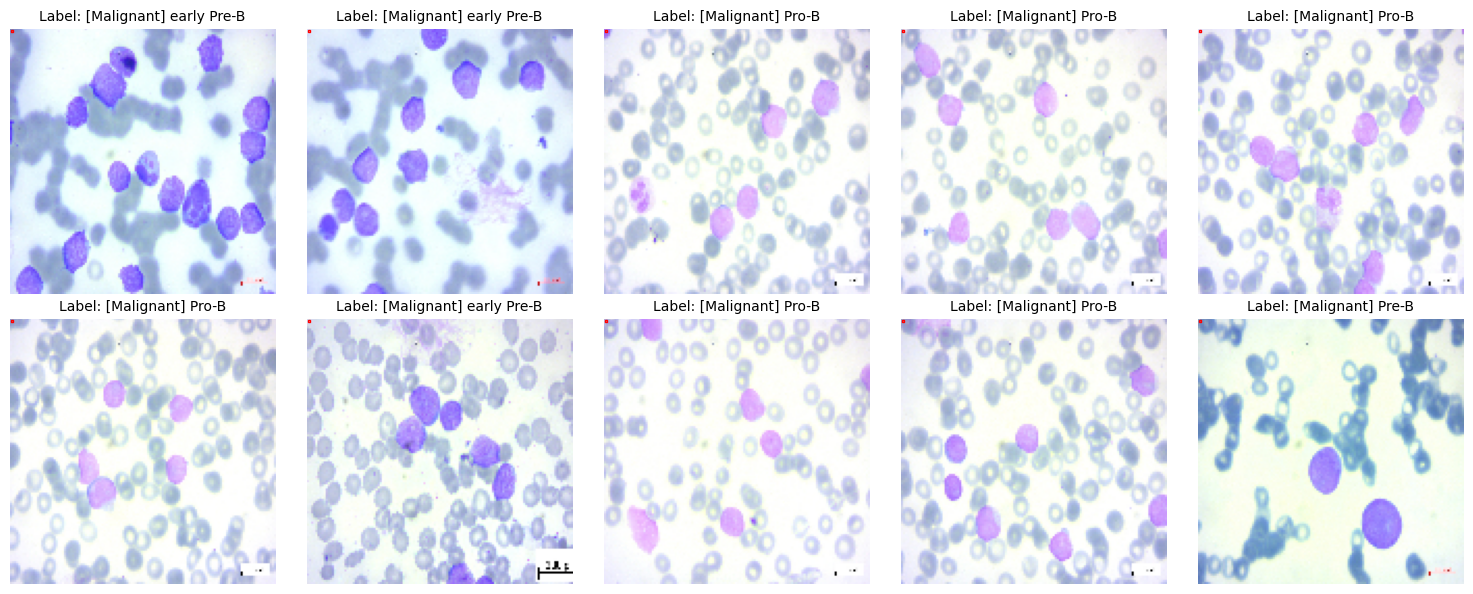

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def display_sample_images(generator, num_samples=10, grid_size=(2, 5)):
    # Get a batch of images and labels
    images, labels = next(generator)

    # Get class labels from generator
    class_labels = list(generator.class_indices.keys())

    # Set up the plot
    plt.figure(figsize=(15, 6))

    for i in range(num_samples):
        # Extract and prepare the image
        img = images[i]
        label = class_labels[np.argmax(labels[i])]

        plt.subplot(grid_size[0], grid_size[1], i + 1)
        plt.imshow(img)
        plt.title(f'Label: {label}', fontsize=10)
        plt.axis('off')  # Hide axes

        # Add border around the image
        plt.gca().add_patch(plt.Rectangle((0, 0), 1, 1, fill=False, edgecolor='red', linewidth=1))

    plt.tight_layout()
    plt.show()

# Example usage
display_sample_images(train_generator, num_samples=10, grid_size=(2, 5))


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


101/101 ━━━━━━━━━━━━━━━━━━━━ 1453s 13s/step - accuracy: 0.4589 - loss: 1.3243 - val_accuracy: 0.7778 - val_loss: 0.5362
Epoch 2/10
  1/101 ━━━━━━━━━━━━━━━━━━━━ 3:25 2s/step - accuracy: 0.8125 - loss: 0.5773

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


101/101 ━━━━━━━━━━━━━━━━━━━━ 46s 437ms/step - accuracy: 0.8125 - loss: 0.5773 - val_accuracy: 0.8000 - val_loss: 0.4980
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 283s 3s/step - accuracy: 0.7870 - loss: 0.4893 - val_accuracy: 0.7314 - val_loss: 0.6296
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5938 - loss: 0.7054 - val_accuracy: 0.8500 - val_loss: 0.4352
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 276s 3s/step - accuracy: 0.8095 - loss: 0.4769 - val_accuracy: 0.8800 - val_loss: 0.2921
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.1791 - val_accuracy: 0.9500 - val_loss: 0.2258
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 330s 3s/step - accuracy: 0.8677 - loss: 0.2979 - val_accuracy: 0.9344 - val_loss: 0.1952
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.3861 - val_accuracy: 0.8500 - val_loss: 0.4127
Epoch 9/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 272s 3s/step - accuracy: 0.8852 - loss: 0.3055 - val_accuracy: 0.9032

In [ ]:
# Evaluate model
validation_generator.reset()
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

print('Classification Report')
target_names = ['early_pre_b', 'pre_b', 'pro_b', 'Benign']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


102/102 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step
Confusion Matrix
[[ 36 153 130 193]
 [ 91 265 243 366]
 [ 92 194 198 312]
 [ 92 271 252 364]]
Classification Report
              precision    recall  f1-score   support

 early_pre_b       0.12      0.07      0.09       512
       pre_b       0.30      0.27      0.29       965
       pro_b       0.24      0.25      0.24       796
      Benign       0.29      0.37      0.33       979

    accuracy                           0.27      3252
   macro avg       0.24      0.24      0.24      3252
weighted avg       0.25      0.27      0.26      3252



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


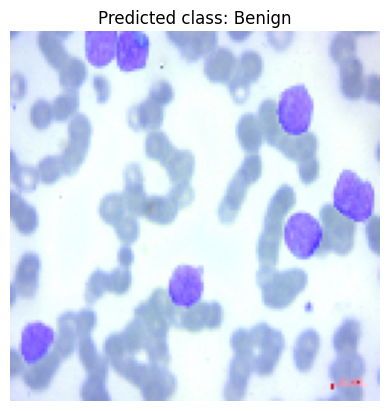

Predicted class for the image: Benign


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def classify_image(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(img_width, img_height))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Rescale the image

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]

    # Map the class index to class name
    class_names = ['early_pre_b', 'pre_b', 'pro_b', 'Benign']
    class_name = class_names[predicted_class]

    # Display the image and the predicted class
    plt.imshow(img)
    plt.title(f'Predicted class: {class_name}')
    plt.axis('off')  # Hide axes
    plt.show()

    return class_name

# Example usage
image_path = '/content/Snp_147 (92).jpg'  # Replace with your image path
print(f'Predicted class for the image: {classify_image(image_path)}')

In [ ]:
model.save('blood_cancer_classifier.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


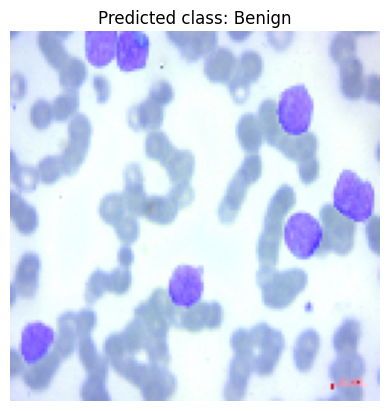

Predicted class for /Snp_147 (92).jpg: Benign
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


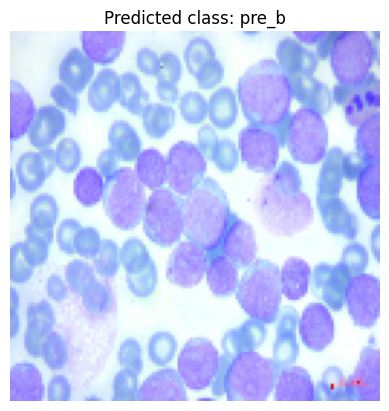

Predicted class for /Snap_798.jpg: pre_b
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


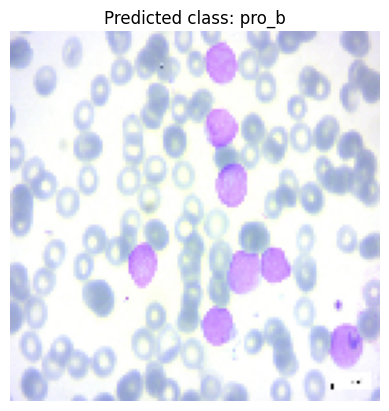

Predicted class for /Snap_745.jpg: pro_b
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


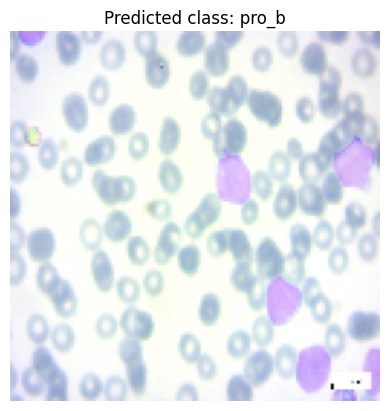

Predicted class for /Snap_755.jpg: pro_b
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


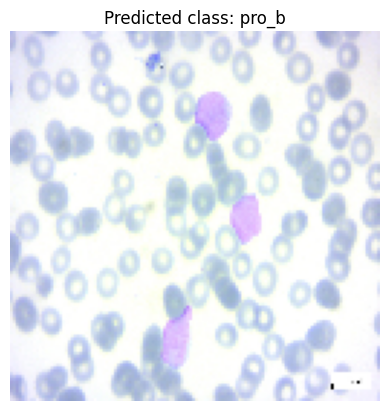

Predicted class for /Snap_758.jpg: pro_b


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def classify_images(image_paths, model, img_width, img_height):
    # Ensure 'class_names' is defined here or passed as a parameter
    class_names = ['early_pre_b', 'pre_b', 'pro_b', 'Benign']

    for image_path in image_paths:
        # Load and preprocess the image
        img = load_img(image_path, target_size=(img_width, img_height))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array = img_array / 255.0  # Rescale the image

        # Predict the class
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Map the class index to class name
        class_name = class_names[predicted_class]

        # Display the image and the predicted class
        plt.imshow(img)
        plt.title(f'Predicted class: {class_name}')
        plt.axis('off')  # Hide axes
        plt.show()

        print(f'Predicted class for {image_path}: {class_name}')

# Example usage
image_paths = [
    '/Snp_147 (92).jpg',
    '/Snap_798.jpg',
    '/Snap_745.jpg',
    '/Snap_755.jpg',
    '/Snap_758.jpg',

]


classify_images(image_paths, model, img_width, img_height)


In [ ]:
from google.colab import files
files.download('blood_cancer_classifier.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/content/Debernardi et al 2020 data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv('/content/Debernardi et al 2020 data.csv')
cols = df.columns.to_list()
df.diagnosis = df.diagnosis == 3
df.sex = df.sex.map({'M': 1, 'F': 0})
df = df[['creatinine',
         'plasma_CA19_9',
         'age',
         'sex',
         'LYVE1',
         'REG1B',
         'TFF1',
         'diagnosis']].copy()
## Turn multiclass problem into binary classification problem, it gives best results (tested but not shown in the final version) ##
df.head(20)

creatinine  plasma_CA19_9  age  sex     LYVE1      REG1B        TFF1  \
0      1.83222           11.7   33    0  0.893219   52.94884  654.282174   
1      0.97266            NaN   81    0  2.037585   94.46703  209.488250   
2      0.78039            7.0   51    1  0.145589  102.36600  461.141000   
3      0.70122            8.0   61    1  0.002805   60.57900  142.950000   
4      0.21489            9.0   62    1  0.000860   65.54000   41.088000   
5      0.84825            NaN   53    1  0.003393   62.12600   59.793000   
6      0.62205            NaN   70    1  0.174381  152.27700  117.516000   
7      0.89349           11.0   58    0  0.003574    3.73000   40.294000   
8      0.48633            NaN   59    0  0.001945    7.02100   26.782000   
9      0.61074           24.0   56    0  0.278778   83.92800   19.185000   
10     0.29406            NaN   77    0  0.001176    6.21800   28.297000   
11     1.05183           23.0   71    1  0.860337  243.08200  608.284000   
12     0.85956            NaN   49    0  1.416314  151.83077   74.189903   
13     1.91139            7.0   53    1  1.516773  150.89000  590.686000   
14     0.91611           12.0   56    0  0.599645   93.81100   93.576000   
15     0.50895           28.0   60    0  0.002036   24.36600   19.698000   
16     0.41847            9.0   69    0  0.001674   17.10200    0.032641   
17     0.80301           47.0   60    0  0.003212    3.58800   30.071000   
18     1.28934           17.0   55    1  2.285351   67.46800  269.805000   
19     0.50895            8.7   28    0  0.583010   13.61906  267.193539   

    diagnosis  
0       False  
1       False  
2       False  
3       False  
4       False  
5       False  
6       False  
7       False  
8       False  
9       False  
10      False  
11      False  
12      False  
13      False  
14      False  
15      False  
16      False  
17      False  
18      False  
19      False

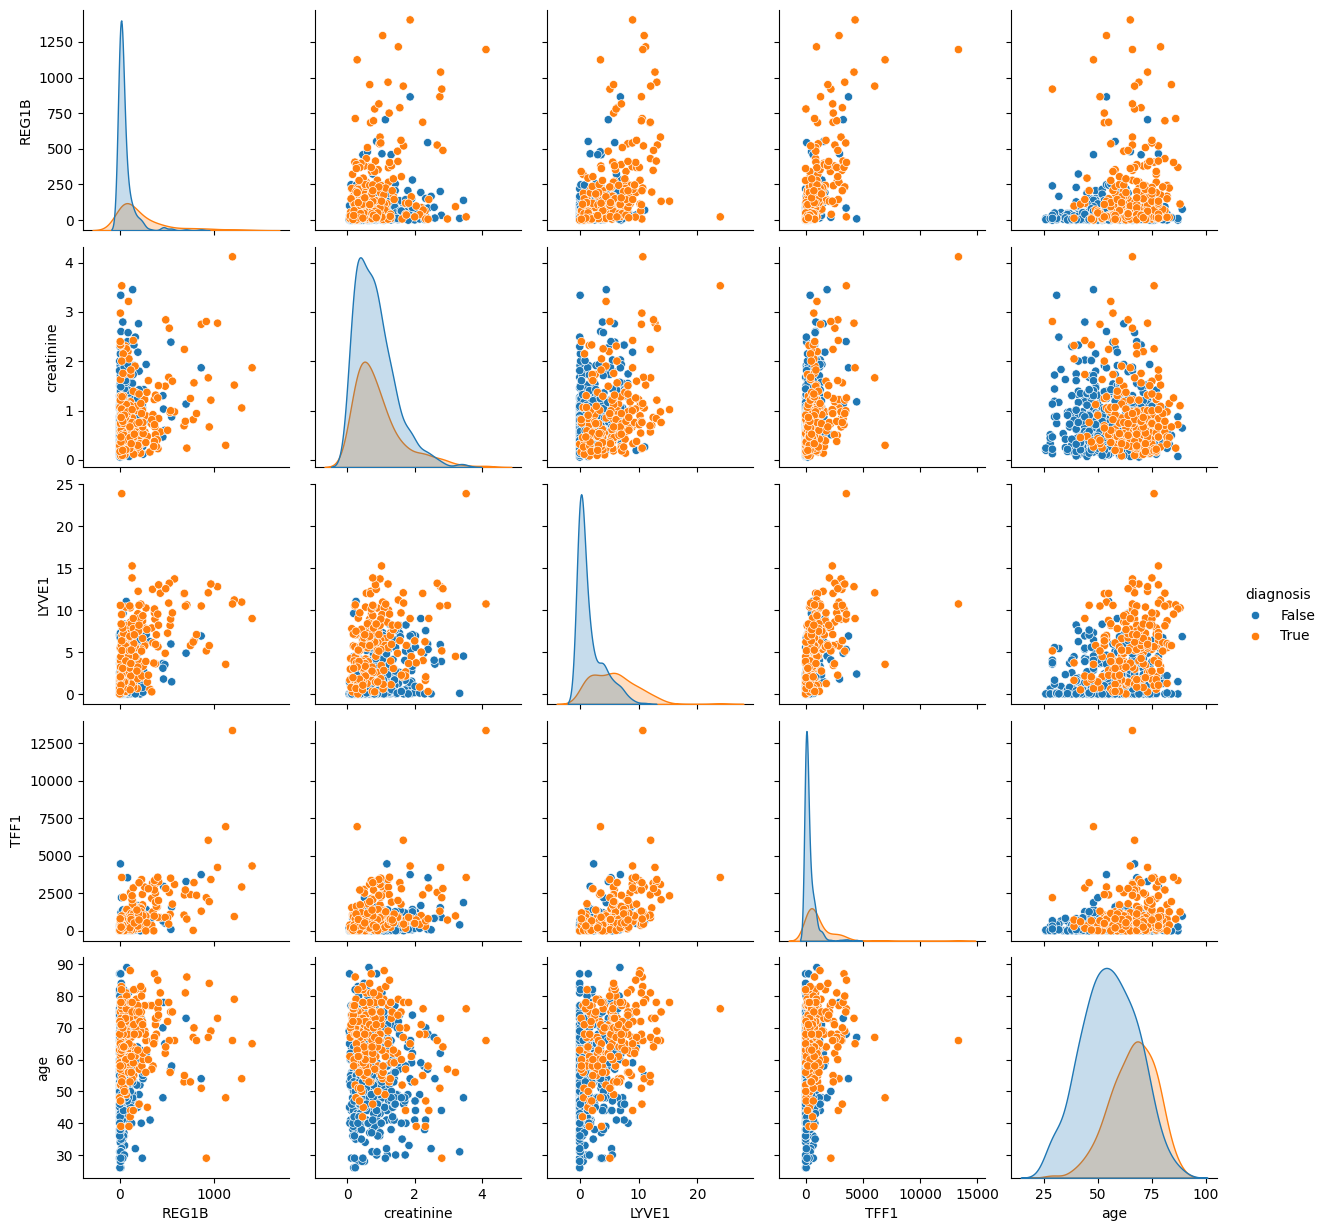

In [4]:
sns.pairplot(data = df, vars=['REG1B', 'creatinine', 'LYVE1', 'TFF1', 'age'], hue='diagnosis', diag_kind='kde')

<Axes: >

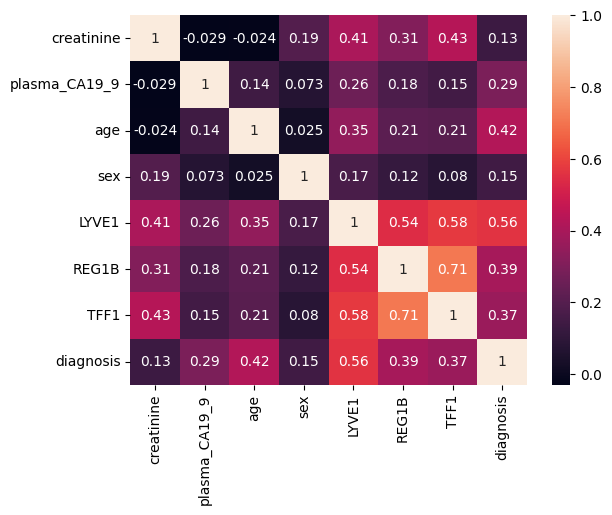

In [5]:
corr = df.dropna().corr()
sns.heatmap(corr, annot=True)

Best parameters:  {'rf__max_depth': 10, 'rf__n_estimators': 100}
Best score:  0.8600620567375886
Test set accuracy:  0.864406779661017


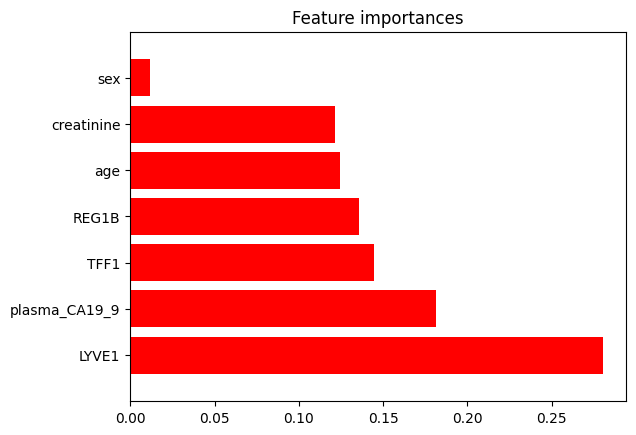

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for RandomForest, use imputer to change NaN values to mean.
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('rf', RandomForestClassifier())
])

# Define the grid of parameters to search over
param_grid = {
    'rf__n_estimators': [100],
    'rf__max_depth': [None, 5, 10]
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=10)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Select the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Print the accuracy of the best model on the test set
print("Test set accuracy: ", accuracy_score(y_test, y_pred))

# Get feature importances from the best model
importances = best_model.named_steps['rf'].feature_importances_

# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.ylim([-1, X_train.shape[1]])
plt.show()


Best parameters:  {'xgb__learning_rate': 0.01, 'xgb__n_estimators': 200}
Best score:  0.8855767077267638
Classification report: 
               precision    recall  f1-score   support

       False       0.91      0.94      0.93        80
        True       0.86      0.82      0.84        38

    accuracy                           0.90       118
   macro avg       0.89      0.88      0.88       118
weighted avg       0.90      0.90      0.90       118

Balanced accuracy:  0.8766447368421053


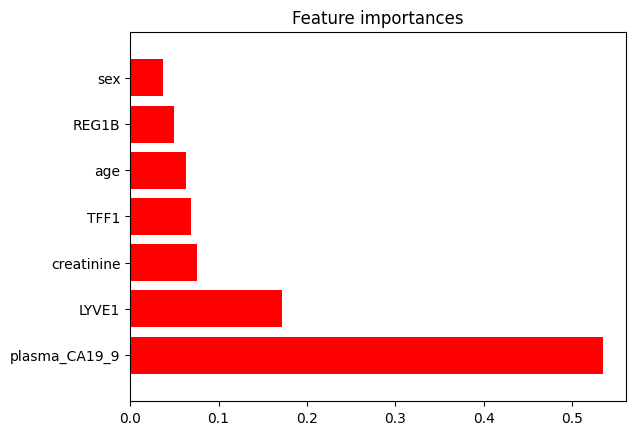

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import  classification_report, balanced_accuracy_score

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for scaling and XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(eval_metric='logloss'))
])

# Define the grid of parameters to search over
param_grid = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.2]
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Select the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Print the classification report
print("Classification report: \n", classification_report(y_test, y_pred))

# Print the balanced accuracy
print("Balanced accuracy: ", balanced_accuracy_score(y_test, y_pred))

# Get feature importances from the best model
importances = best_model.named_steps['xgb'].feature_importances_

# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.ylim([-1, X_train.shape[1]])
plt.show()